Template for different way of handling outliers. Codes explanation are at 
https://youranalystbuddy.com/encode-categorical-data/

## Load data and investigate categorical distributions

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sample-categorical-data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AgeGroup          33 non-null     object
 1   State             33 non-null     object
 2   Area              33 non-null     object
 3   EmploymentSector  33 non-null     object
 4   Opinion           33 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


AgeGroup


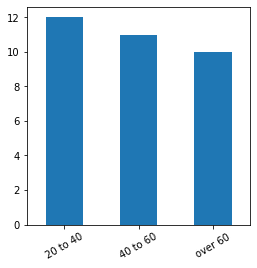

State


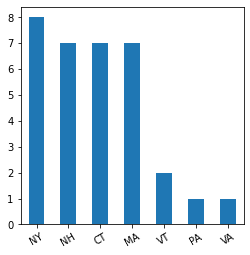

Area


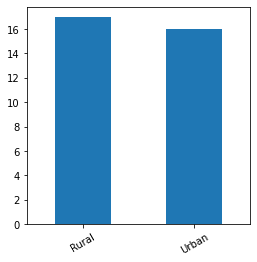

EmploymentSector


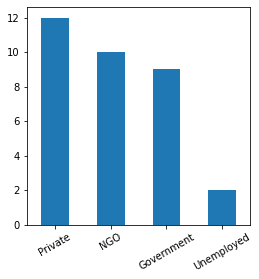

Opinion


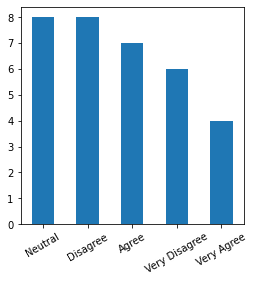

In [2]:
for col in data.columns:
    print(col)
    data[col].value_counts().plot.bar(rot=30, figsize=(4,4))
    plt.show()

## Encoding nominal data

In [3]:
nom_cols = ['State', 'EmploymentSector']
infreq_threshold = 0.1

from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(min_frequency=int(len(data) * infreq_threshold), handle_unknown='infrequent_if_exist')
oh_codes = oh_encoder.fit_transform(data[nom_cols])

oh_codes.todense()

matrix([[0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1., 0

## Encoding ordinal data

In [4]:
ord_cols = ['AgeGroup', 'Area', 'Opinion']

ord_classes = [
    ['20 to 40', '40 to 60', 'over 60'],
    ['Rural', 'Urban'],
    ['Very Disagree', 'Disagree', 'Neutral', 'Agree', 'Very Agree']
]

from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(categories=ord_classes)
ord_codes = ord_encoder.fit_transform(data[ord_cols])

ord_codes

array([[1., 0., 2.],
       [1., 0., 3.],
       [0., 0., 1.],
       [2., 0., 4.],
       [1., 0., 2.],
       [2., 0., 1.],
       [0., 1., 2.],
       [0., 1., 0.],
       [1., 1., 4.],
       [1., 0., 0.],
       [0., 1., 1.],
       [0., 1., 3.],
       [2., 1., 2.],
       [1., 0., 3.],
       [1., 1., 1.],
       [0., 0., 3.],
       [2., 0., 4.],
       [1., 1., 4.],
       [1., 0., 3.],
       [2., 0., 0.],
       [0., 1., 3.],
       [1., 1., 0.],
       [0., 1., 1.],
       [0., 1., 1.],
       [2., 0., 1.],
       [2., 1., 3.],
       [2., 0., 0.],
       [0., 0., 2.],
       [2., 1., 2.],
       [1., 0., 2.],
       [2., 0., 1.],
       [0., 1., 2.],
       [0., 1., 0.]])